# **Sales analysis of USA**

In [31]:
import pandas as pd
import os

In [32]:
# Merging 12 months of sales data into a single csv file

files = [file for file in os.listdir('/content/os')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('/content/os/' +file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index = False)

**Read in updated data frame**

In [33]:
all_data = pd.read_csv('/content/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


# **Clean up the data**

**Drop NaN rows** 

In [34]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
all_data = all_data.dropna(how='all')

**find OR and delete it**

In [36]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

**Convert columns to the correct type**

In [37]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

all_data['Price Each'] = all_data['Price Each'].astype(float)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


## **Augment data with additional columns**

**Adding month columns**

In [38]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


**Add a sales columns**

In [39]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


**Adding a city column**

In [56]:
# lets use apply

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY)
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY)
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA)


**1) What was the best month for sales? How much was earned that month ?**

In [45]:
 results = all_data.groupby('Month').sum()


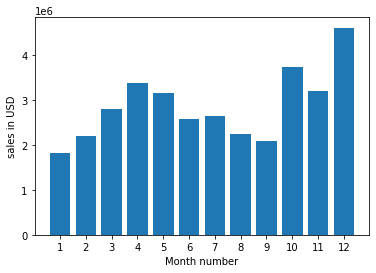

In [46]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])

plt.xticks(months)

plt.xlabel('Month number')
plt.ylabel('sales in USD')

plt.show()

**2) What USA city had highest number of sales ?**

In [58]:
 results = all_data.groupby('City').sum()
 results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


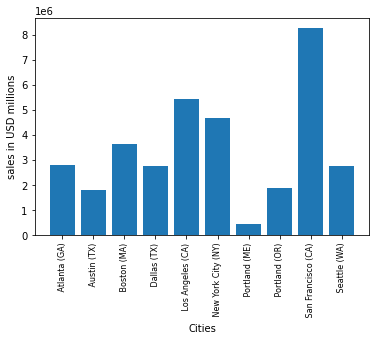

In [67]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation = 'vertical', size = 8)

plt.xlabel('Cities')
plt.ylabel('sales in USD millions')

plt.show()

**3) What time we should display advertisements to maximize likelihood of customer's buying product ?**

In [71]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [73]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX),10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA),17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY),17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY),22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),16,10


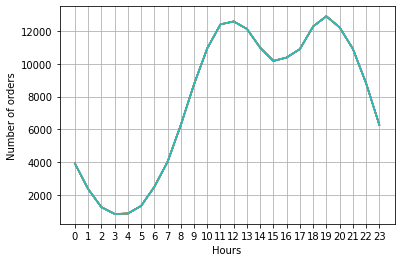

In [78]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours)

plt.xlabel('Hours')

plt.ylabel('Number of orders')

plt.grid()

plt.show()

**4) What products are most often sold together ?**

In [89]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['group'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'group']].drop_duplicates()

df.head()

<ipython-input-89-75186ea48edc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,group
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"


In [91]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**5) What product sold the most? Why do you think it sold the most?**

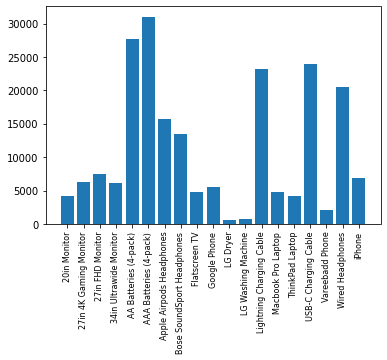

In [92]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

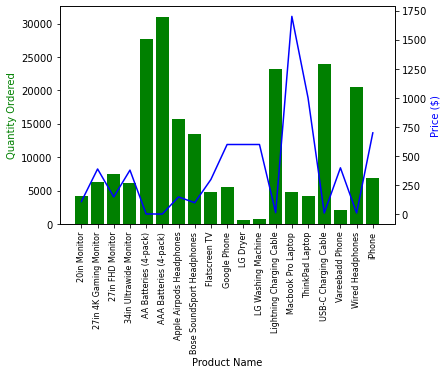

In [93]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

# **Presented by Syed Miran of CSD**